# **Required Library**

In [1]:
!pip install opencv-python numpy pandas matplotlib

# **Import Packages**

In [2]:
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
# from keras.utils import layer_utils
# from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
# from keras.applications.imagenet_utils import _obtain_input_shape # this will work for older versions of keras. 2.2.0 or before
# from keras.engine.topology import get_source_inputs

# **Build VGG-16 Model**

In [3]:
# here clsses count 2 means that the dataset contains 2 types of data, its a variable which depends on dataset
def VGGupdated(input_tensor=None,classes=2):    
   
    img_rows, img_cols = 256, 256   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)
   
    img_input = Input(shape=img_dim)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    
    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.
   
     
    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model

# **Model Compilation**

In [4]:
model = VGGupdated(classes = 2) # two different types of classes available in the dataset

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Import the Dataset**

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/kaggle/input/medical-scan-classification-dataset/Monkeypox/Monkeypox')

data_types = os.listdir('/kaggle/input/medical-scan-classification-dataset/Monkeypox/Monkeypox')
print (data_types)  #what kinds of rooms are in this dataset

print("Types of data found: ", len(dataset_path))

['Monkeypox', 'Non Monkeypox']
Types of data found:  2


# **Dataset Array Generation**

In [7]:
datas = []

for item in data_types:
 # Get all the file names
 all_data = os.listdir('/kaggle/input/medical-scan-classification-dataset/Monkeypox/Monkeypox' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for data in all_data:
    datas.append((item, str('/kaggle/input/medical-scan-classification-dataset/Monkeypox/Monkeypox' + '/' +item) + '/' + data))
    # print(rooms)

# **Build a Dataframe**

In [8]:
# Build a dataframe        
datas_df = pd.DataFrame(data=datas, columns=['data type', 'image'])
print(datas_df.head())
#print(rooms_df.tail())

   data type                                              image
0  Monkeypox  /kaggle/input/medical-scan-classification-data...
1  Monkeypox  /kaggle/input/medical-scan-classification-data...
2  Monkeypox  /kaggle/input/medical-scan-classification-data...
3  Monkeypox  /kaggle/input/medical-scan-classification-data...
4  Monkeypox  /kaggle/input/medical-scan-classification-data...


# **How Many Samples for Each Category**

In [9]:
# Let's check how many samples for each category are present
print("Total number of rooms in the dataset: ", len(datas_df))

data_count = datas_df['data type'].value_counts()

print("rooms in each category: ")
print(data_count)

Total number of rooms in the dataset:  3192
rooms in each category: 
data type
Non Monkeypox    1764
Monkeypox        1428
Name: count, dtype: int64


# **Label the Dataset**

In [10]:
import cv2
path = '/kaggle/input/medical-scan-classification-dataset/Monkeypox/Monkeypox/'


im_size = 256

images = []
labels = []

for i in data_types:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

# **Normalize the Dataset**

In [11]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape 

(3192, 256, 256, 3)

# **Convert Categorical Data Into a Numerical Format**

In [12]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=datas_df['data type'].values
#print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
# print (y)

# **Number of Samples**

In [13]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Reshape y into a 2D array if it's 1D
y = np.array(y).reshape(-1, 1)

# Apply one-hot encoding to the first (and only) column
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), [0])  # Encode the first column
    ],
    remainder='passthrough'  # Leave the rest of the columns unchanged
)

# Apply the transformer to your data
Y = column_transformer.fit_transform(y)

# Shape after transformation
Y.shape


(3192, 2)

# **Train Test Split**

In [15]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.20, random_state=420)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2553, 256, 256, 3)
(2553, 2)
(639, 256, 256, 3)
(639, 2)


# **Model Train**

In [16]:
history = model.fit(train_x, train_y, epochs = 15, batch_size = 32) 

Epoch 1/15


I0000 00:00:1728143463.796909     115 service.cc:145] XLA service 0x785410002d50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728143463.797007     115 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728143463.797015     115 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
2024-10-05 15:51:42.172075: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng1{k2=8,k3=0} for conv (f32[64,64,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,256,256]{3,2,1,0}, f32[32,64,256,256]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-10-05 15:51:42.449636: E external/lo

80/80 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.5487 - loss: 1.6863
Epoch 2/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 514ms/step - accuracy: 0.5556 - loss: 0.6875
Epoch 3/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 514ms/step - accuracy: 0.5389 - loss: 0.6901
Epoch 4/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 515ms/step - accuracy: 0.5645 - loss: 0.6856
Epoch 5/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 515ms/step - accuracy: 0.5325 - loss: 0.6913
Epoch 6/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 82s 520ms/step - accuracy: 0.5617 - loss: 0.6860
Epoch 7/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 512ms/step - accuracy: 0.5554 - loss: 0.6877
Epoch 8/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 516ms/step - accuracy: 0.5337 - loss: 0.6924
Epoch 9/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 514ms/step - accuracy: 0.5546 - loss: 0.6875
Epoch 10/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 514ms/step - accuracy: 0.5585 - loss: 0.6868
Epoch 11/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 515ms/step - accuracy: 0.5438 - loss: 0.6895
Epoch 12/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 514ms/step 

# **Model Evaluation**

In [20]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
#print ("Test Accuracy = " + str(preds[1]))

20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5713 - loss: 0.6838 
Loss = 0.6857514977455139


In [21]:
test_loss, test_acc = model.evaluate(test_x, test_y)
print(f'Test accuracy: {test_acc}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.5713 - loss: 0.6838
Test accuracy: 0.5618153214454651


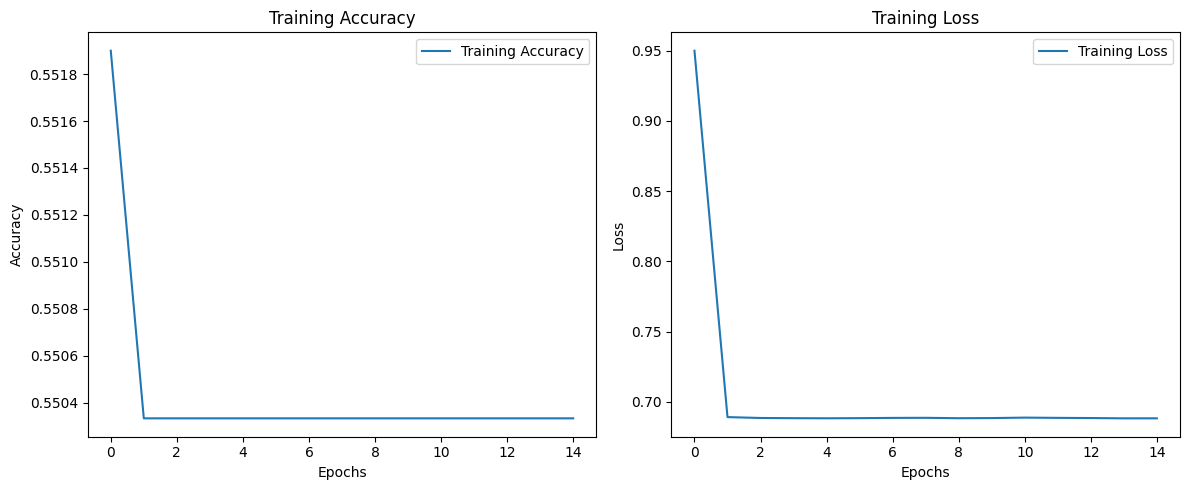

In [22]:
import matplotlib.pyplot as plt

# Plotting the training accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **Confusion Matrix**

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step


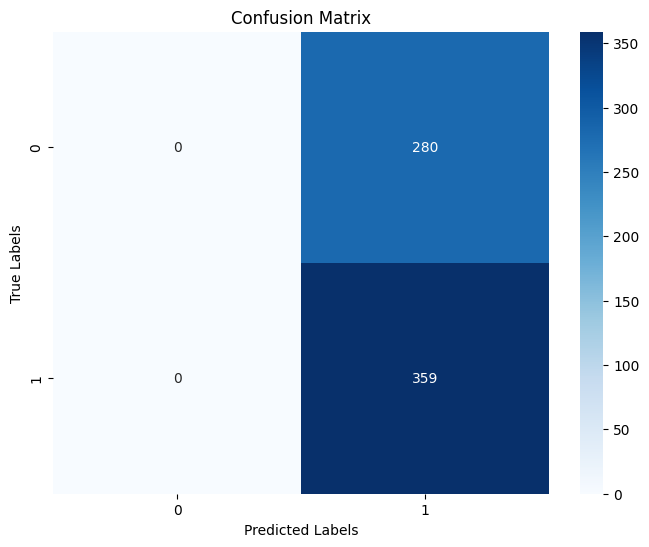

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Assuming y_true is the true labels and y_pred are the predicted labels
y_pred = model.predict(test_x)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_y, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Input image shape: (1, 256, 256, 3)


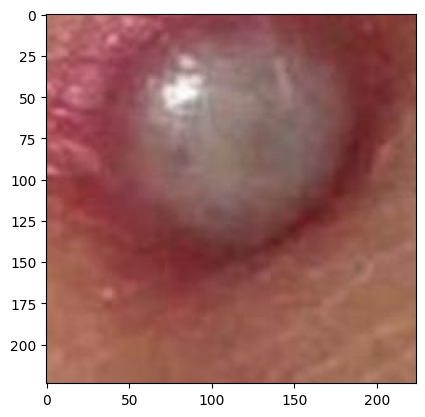

In [34]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow

img_path = '/kaggle/input/medical-scan-classification-dataset/Monkeypox/Monkeypox/Monkeypox/M17_01_13.jpg'

img = image.load_img(img_path, target_size=(256, 256))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

# **Model Prediction**

In [35]:
# Assuming `x` is your input data and `model` is your trained model
predictions = model.predict(x)

# Select the output with the maximum value
selected_output = np.argmax(predictions, axis=1)

# Print the selected output class
print("Selected Output Class:", selected_output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Selected Output Class: [1]


In [24]:
model.save('vggMonkeypox.h5')